# Assignment 3 – Association Rule Mining

### Instructions
In this assignment, you will explore Association Rule Mining using the Apriori and FP-Growth algorithms. Each task focuses on discovering item relationships, performance comparison, and practical interpretation.


## Task 1 – Apriori Algorithm
**Objective:** Identify strong association rules among purchased items.

### Steps
1. Download and load Groceries.csv dataset.
2. Transform to basket format.
3. Generate frequent itemsets (min_support=0.02).
4. Extract rules (min_confidence=0.3).
5. Visualize and interpret.

### Step 0: Download Dataset from Kaggle

First, we'll download the Groceries dataset using kagglehub. This requires Kaggle API credentials in `.env` file.

In [45]:
# Load environment variables and download dataset
import os
import shutil
from dotenv import load_dotenv
import kagglehub

# Load .env file
load_dotenv()

# Set Kaggle credentials from environment variables
os.environ['KAGGLE_USERNAME'] = os.getenv('KAGGLE_USERNAME')
os.environ['KAGGLE_KEY'] = os.getenv('KAGGLE_KEY')

# Create datasets folder in project root if it doesn't exist
project_root = os.getcwd()
datasets_dir = os.path.join(project_root, 'datasets')
os.makedirs(datasets_dir, exist_ok=True)

# Download Groceries dataset to cache first
print("Downloading Groceries dataset from Kaggle...")
cache_path = kagglehub.dataset_download("heeraldedhia/groceries-dataset")
print(f"✓ Dataset downloaded to cache: {cache_path}")

# List files in the downloaded directory to find the CSV file
print("\nFiles in downloaded directory:")
files = os.listdir(cache_path)
for file in files:
    print(f"  - {file}")

# Find the CSV file (it might be named differently)
csv_files = [f for f in files if f.endswith('.csv')]
if csv_files:
    csv_filename = csv_files[0]
    print(f"\n✓ Found CSV file: {csv_filename}")
    
    # Copy CSV file to datasets folder in project root
    source_path = os.path.join(cache_path, csv_filename)
    dest_path = os.path.join(datasets_dir, 'Groceries.csv')
    
    shutil.copy2(source_path, dest_path)
    print(f"✓ Copied to project directory: {dest_path}")
    
    # Set path to local datasets folder
    path = datasets_dir
else:
    print("\n⚠️  No CSV file found in directory")
    csv_filename = None
    path = datasets_dir

✓ Dataset downloaded to cache: /Users/harshwardhanpatil/.cache/kagglehub/datasets/heeraldedhia/groceries-dataset/versions/1

Files in downloaded directory:
  - Groceries_dataset.csv

✓ Found CSV file: Groceries_dataset.csv
✓ Copied to project directory: /Users/harshwardhanpatil/Work/College Projects/Data Mining Assignment 3/datasets/Groceries.csv


## Task 1A: Load and Display Dataset (4 points)

**Objective:** Load the Groceries.csv dataset and display the first 10 transactions in a readable format.


In [46]:
# Task 1A: Load and display the dataset
import pandas as pd

# Load Groceries.csv from datasets folder
dataset_path = os.path.join('datasets', 'Groceries.csv')

if not os.path.exists(dataset_path):
    raise FileNotFoundError(f"Dataset not found at {dataset_path}. Please run Step 0 (download cell) first.")

df = pd.read_csv(dataset_path)
print(f"✓ Dataset loaded successfully!")
print(f"\nDataset Info:")
print(f"  - Total rows: {len(df):,}")
print(f"  - Columns: {list(df.columns)}")
print(f"  - Shape: {df.shape}")

# Display first 10 transactions in readable format
print("\n" + "=" * 60)
print("FIRST 10 TRANSACTIONS (Task 1A)")
print("=" * 60)
print()

for idx, row in df.head(10).iterrows():
    print(f"Transaction {idx + 1}:")
    print(f"  {row.to_dict()}")
    print()

# Also display as a table
print("\n" + "=" * 60)
print("First 10 transactions (table format):")
print("=" * 60)
df.head(10)


✓ Dataset loaded successfully!

Dataset Info:
  - Total rows: 38,765
  - Columns: ['Member_number', 'Date', 'itemDescription']
  - Shape: (38765, 3)

FIRST 10 TRANSACTIONS (Task 1A)

Transaction 1:
  {'Member_number': 1808, 'Date': '21-07-2015', 'itemDescription': 'tropical fruit'}

Transaction 2:
  {'Member_number': 2552, 'Date': '05-01-2015', 'itemDescription': 'whole milk'}

Transaction 3:
  {'Member_number': 2300, 'Date': '19-09-2015', 'itemDescription': 'pip fruit'}

Transaction 4:
  {'Member_number': 1187, 'Date': '12-12-2015', 'itemDescription': 'other vegetables'}

Transaction 5:
  {'Member_number': 3037, 'Date': '01-02-2015', 'itemDescription': 'whole milk'}

Transaction 6:
  {'Member_number': 4941, 'Date': '14-02-2015', 'itemDescription': 'rolls/buns'}

Transaction 7:
  {'Member_number': 4501, 'Date': '08-05-2015', 'itemDescription': 'other vegetables'}

Transaction 8:
  {'Member_number': 3803, 'Date': '23-12-2015', 'itemDescription': 'pot plants'}

Transaction 9:
  {'Member_

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
5,4941,14-02-2015,rolls/buns
6,4501,08-05-2015,other vegetables
7,3803,23-12-2015,pot plants
8,2762,20-03-2015,whole milk
9,4119,12-02-2015,tropical fruit


## Task 1B: Exploratory Data Analysis (5 points)

**Objective:** Perform basic EDA:
- Display top 15 most frequent items (bar plot)
- Check average number of items per transaction
- Visualize item frequency distribution


TASK 1B: EXPLORATORY DATA ANALYSIS

1. Top 15 Most Frequent Items:
itemDescription
whole milk          2502
other vegetables    1898
rolls/buns          1716
soda                1514
yogurt              1334
root vegetables     1071
tropical fruit      1032
bottled water        933
sausage              924
citrus fruit         812
pastry               785
pip fruit            744
shopping bags        731
canned beer          717
bottled beer         687
Name: count, dtype: int64


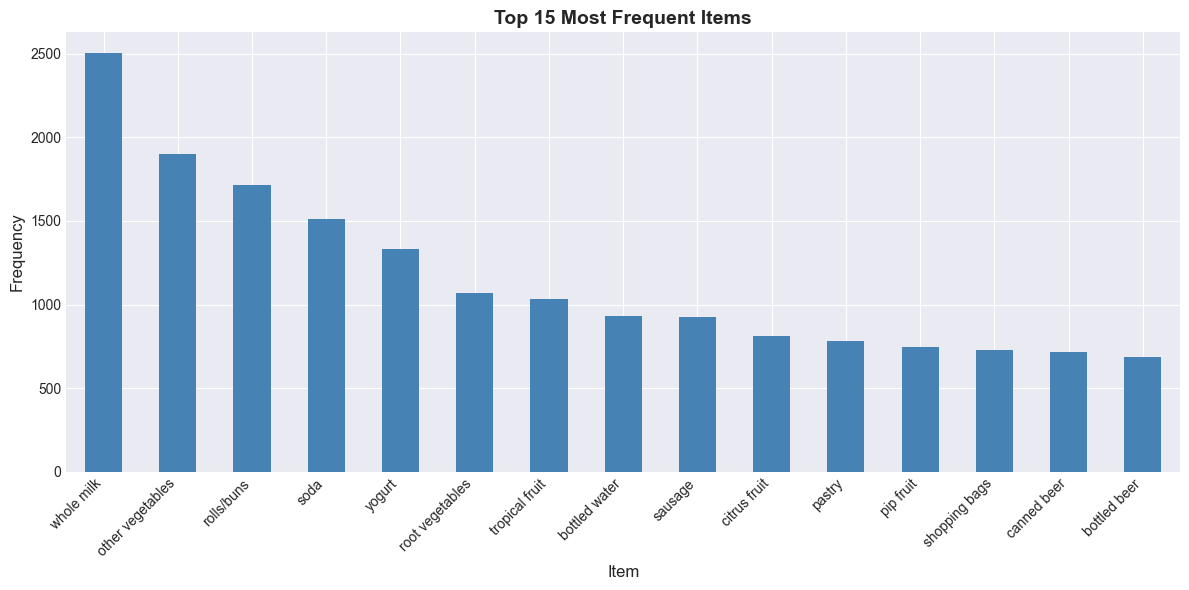


2. Average number of items per transaction: 9.94
   - Min items in a transaction: 2
   - Max items in a transaction: 36
   - Median items per transaction: 9.00


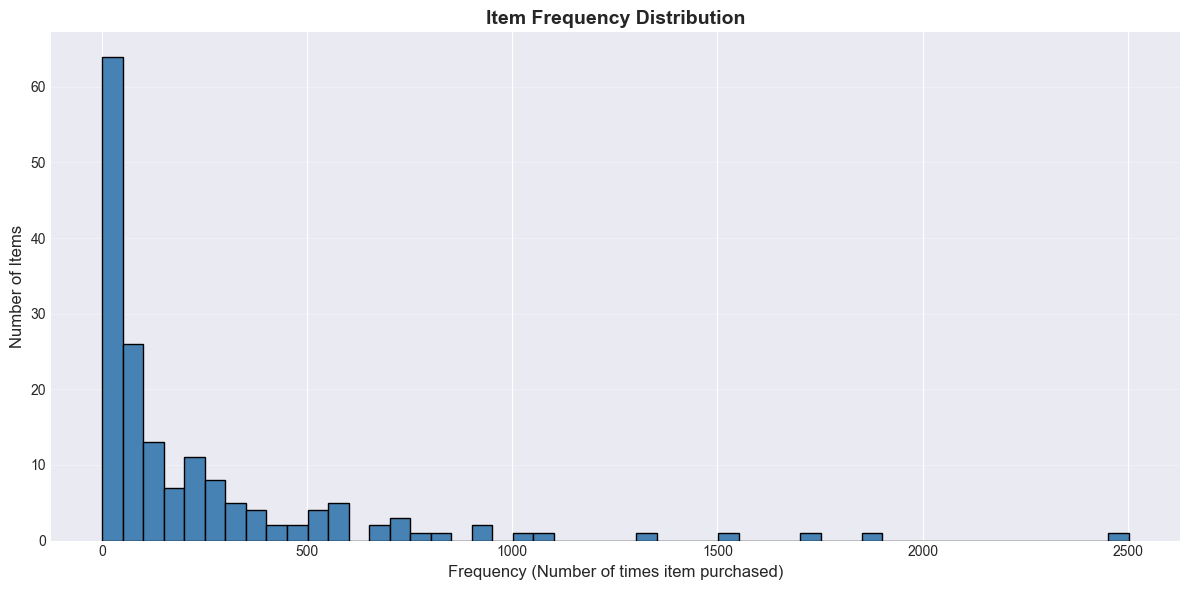


Dataset Summary:
  - Total transactions: 3,898
  - Total unique items: 167
  - Total item purchases: 38,765


In [47]:
# Task 1B: Exploratory Data Analysis
import matplotlib.pyplot as plt
import seaborn as sns

print("=" * 60)
print("TASK 1B: EXPLORATORY DATA ANALYSIS")
print("=" * 60)

# 1. Count frequency of each item
item_counts = df['itemDescription'].value_counts()

print("\n1. Top 15 Most Frequent Items:")
top_15 = item_counts.head(15)
print(top_15)

# Create bar plot of top 15 most frequent items
plt.figure(figsize=(12, 6))
top_15.plot(kind='bar', color='steelblue')
plt.title('Top 15 Most Frequent Items', fontsize=14, fontweight='bold')
plt.xlabel('Item', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 2. Calculate average number of items per transaction
items_per_transaction = df.groupby('Member_number').size()
avg_items = items_per_transaction.mean()
print(f"\n2. Average number of items per transaction: {avg_items:.2f}")
print(f"   - Min items in a transaction: {items_per_transaction.min()}")
print(f"   - Max items in a transaction: {items_per_transaction.max()}")
print(f"   - Median items per transaction: {items_per_transaction.median():.2f}")

# 3. Visualize item frequency distribution
plt.figure(figsize=(12, 6))
item_counts.hist(bins=50, color='steelblue', edgecolor='black')
plt.title('Item Frequency Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Frequency (Number of times item purchased)', fontsize=12)
plt.ylabel('Number of Items', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Summary statistics
print(f"\nDataset Summary:")
print(f"  - Total transactions: {df['Member_number'].nunique():,}")
print(f"  - Total unique items: {df['itemDescription'].nunique():,}")
print(f"  - Total item purchases: {len(df):,}")


TASK 1C: TRANSFORM TO BINARY MATRIX

✓ Basket (binary matrix) created successfully!

Shape and Column Count:
  - Shape: (3898, 167)
  - Rows (transactions): 3,898
  - Columns (items): 167
  - Total cells: 650,966

✓ Binary encoding confirmed:
  - Values are binary (0 or 1): True
  - Total items purchased across all transactions: 34,766
  - Average items per transaction: 8.92

Sample of basket matrix (first 5 rows, first 10 columns):


itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries
Member_number,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0
1001,0,0,0,0,0,0,0,0,1,0
1002,0,0,0,0,0,0,0,0,0,0
1003,0,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,0


TASK 1D: APRIORI ALGORITHM

Applying Apriori algorithm with min_support=0.02...
This may take a few moments...

✓ Apriori algorithm completed!
  - Computation time: 0.32 seconds
  - Frequent itemsets found: 894

Top 10 Frequent Itemsets (by support):
      support                        itemsets
85   0.458184                    (whole milk)
52   0.376603              (other vegetables)
64   0.349666                    (rolls/buns)
73   0.313494                          (soda)
86   0.282966                        (yogurt)
79   0.233710                (tropical fruit)
65   0.230631               (root vegetables)
6    0.213699                 (bottled water)
68   0.206003                       (sausage)
485  0.191380  (other vegetables, whole milk)

Frequent itemsets by size:
itemset_size
1     87
2    499
3    290
4     18
Name: count, dtype: int64


TASK 1E: GENERATE ASSOCIATION RULES

Generating association rules with metric='lift', min_threshold=1.0...

✓ Association rules generated!
  - Total rules generated: 2956

Top 10 Strongest Rules (sorted by lift):

Rule 2937:
  Antecedents: frozenset({'sausage', 'whole milk'})
  Consequents: frozenset({'rolls/buns', 'yogurt'})
  Support: 0.0228
  Confidence: 0.2134
  Lift: 1.9169

Rule 2934:
  Antecedents: frozenset({'rolls/buns', 'yogurt'})
  Consequents: frozenset({'sausage', 'whole milk'})
  Support: 0.0228
  Confidence: 0.2051
  Lift: 1.9169

Rule 2935:
  Antecedents: frozenset({'yogurt', 'whole milk'})
  Consequents: frozenset({'sausage', 'rolls/buns'})
  Support: 0.0228
  Confidence: 0.1516
  Lift: 1.8411

Rule 2936:
  Antecedents: frozenset({'sausage', 'rolls/buns'})
  Consequents: frozenset({'yogurt', 'whole milk'})
  Support: 0.0228
  Confidence: 0.2773
  Lift: 1.8411

Rule 2880:
  Antecedents: frozenset({'yogurt', 'other vegetables'})
  Consequents: frozenset({'sausage', 'whol

TASK 1F: VISUALIZE RESULTS


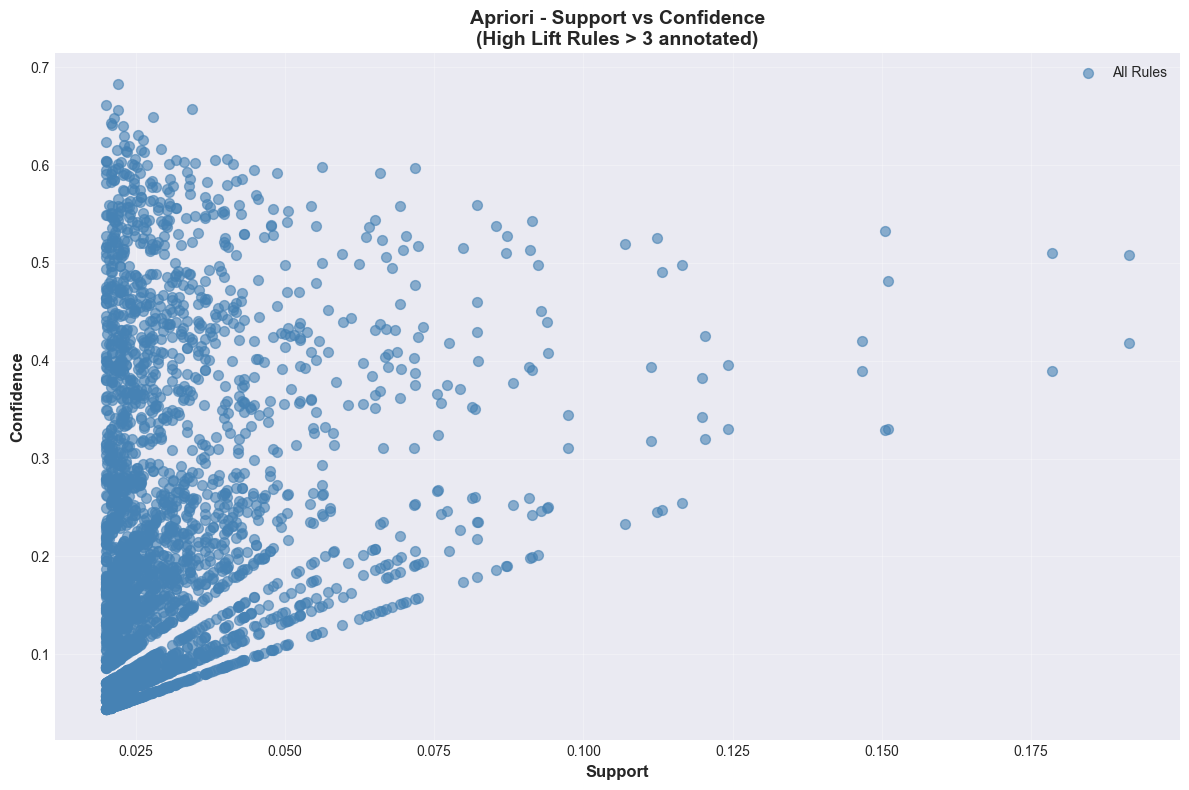


✓ Visualization created!
  - Total rules plotted: 2956
  - High lift rules (lift > 3): 0


MOST INTERESTING RULE ANALYSIS

Most Interesting Rule (Highest Lift):
  Antecedents (If): frozenset({'sausage', 'whole milk'})
  Consequents (Then): frozenset({'rolls/buns', 'yogurt'})

Metrics:
  - Support: 0.0228 (2.28% of transactions)
  - Confidence: 0.2134 (21.34%)
  - Lift: 1.9169

📊 Why this rule is interesting:
  - High Lift (1.92): This rule occurs 1.92x more often
    than would be expected if items were independent.
  - Confidence (21.3%): When customers buy frozenset({'sausage', 'whole milk'}),
    they buy frozenset({'rolls/buns', 'yogurt'}) 21.3% of the time.
  - Support (2.28%): This pattern appears in
    2.28% of all transactions.
